# EE 559 Project 1

#### Comparing couple of images from MNIST dataset using DCNN.

In [1]:
import torch
import matplotlib.pyplot as plt

import dlc_practical_prologue as prologue
from models import *
from training import *
from other import *

torch.manual_seed(2);

# Load the Dataset

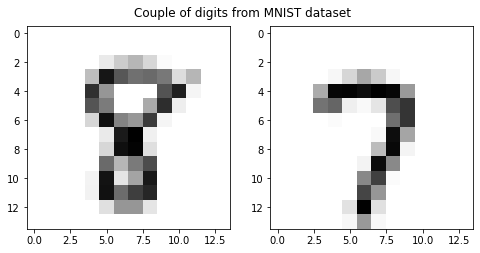

In [2]:
N = 1000
train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(N)

# Example
n = torch.randint(1000,[1])[0]
fig, axs = plt.subplots(1,2, figsize=(8,10))
fig.subplots_adjust(top=1.5)
fig.suptitle('Couple of digits from MNIST dataset')
axs[0].imshow(train_input[n,0], cmap='Greys')
axs[1].imshow(train_input[n,1], cmap='Greys');

# MODEL 1
#### Model directly each couple of images of digits to the binary output through a Multi-Layers Perceptron (IneqMLP)

C:\Users\Riccardo\Anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Device used:  cpu
Loading training and test set...
Splitting the training set in training and validation set...
Data augmentation...
In total there are: 
 - 1800 samples in the Training Set (900 *2), 
 - 100 samples in the Validation Set, 
 - 1000 samples in the Test Set
Number of parameters of the model: 279562
Training...

Training error: 1.444 %
Validation error: 18.000 %
Test error: 17.700 %


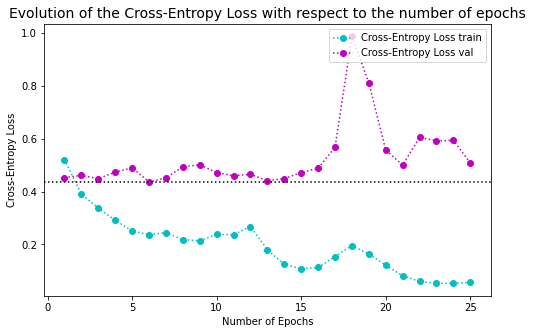

In [3]:
model = IneqMLP()

train_losses, test_losses, _ = run_experiment(model, nb_epochs = 25)
plot_train_val(train_losses, test_losses, period=1, model_name='IneqMLP')

In [4]:
evaluate_model(model, 2)

Number of experiments: 2
Computing...
Training Set: 
- Mean: 0.013,
- Standard Error: 0.013
Validation Set: 
- Mean: 0.190,
- Standard Error: 0.190
Test Set: 
- Mean: 0.151,
- Standard Error: 0.151


# MODEL 2
#### Model directly each couple of images of digits to the binary output through a Convolutional Neural Network (IneqCNet)

Device used:  cpu
Loading training and test set...
Splitting the training set in training and validation set...
Data augmentation...
In total there are: 
 - 1800 samples in the Training Set (900 *2), 
 - 100 samples in the Validation Set, 
 - 1000 samples in the Test Set
Number of parameters of the model: 77530
Training...

Training error: 1.056 %
Validation error: 20.000 %
Test error: 18.000 %


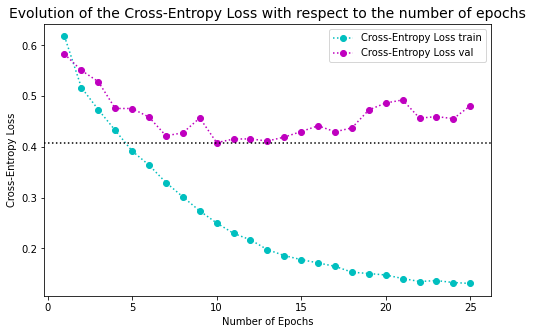

In [5]:
model = IneqCNet()
count_parameters(model)

train_losses, test_losses, test_error = run_experiment(model, nb_epochs = 25)
plot_train_val(train_losses, test_losses, period=1, model_name='IneqCNet')

In [6]:
evaluate_model(model, 2)

Number of experiments: 2
Computing...
Training Set: 
- Mean: 0.015,
- Standard Error: 0.015
Validation Set: 
- Mean: 0.205,
- Standard Error: 0.205
Test Set: 
- Mean: 0.170,
- Standard Error: 0.170


# MODEL 3
#### Firstly model each couple of images of digits to the digits that they represent and then evaluate their inequality. (DigiNET)

# MODEL 4
### Let's combine the first two approaches